# Email Spam Classifier  
### **Author:** Saima Chowdhury
**Email:** saima.chowdhury811@gmail.com

---
**Date:** 2025-10-02  
**Dataset:** Kaggle — *SMS Spam Collection Dataset* (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/suggestions)


***Importing Libraries***

In [18]:
#step-1
import pandas as pd
#import numpy as np

#step-2
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#step-3
from sklearn.model_selection import train_test_split

#step-4
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#NB
from sklearn.naive_bayes import MultinomialNB
#LR
from sklearn.linear_model import LogisticRegression
#RF
from sklearn.ensemble import RandomForestClassifier
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1. Data
---
 **Use the Spam SMS/Email dataset (e.g., SMS Spam Collection from Kaggle).**

In [19]:
df = pd.read_csv('spam.csv' , encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Columns: label (spam/ham), message (text).  
Target: label.

In [20]:
df.rename(columns={'v1': 'label(spam/harm)', 'v2': 'message(text)'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head(10)

,label(spam/harm),message(text)
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Step 2. Preprocessing
---
**1. Clean text (lowercase, remove punctuation, etc.)**

In [21]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned_message'] = df['message(text)'].apply(clean_text)
display(df.head())

,label(spam/harm),message(text),cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


**2. Convert text into numeric features using:**
- Bag of Words (CountVectorizer)
- TF-IDF (TfidfVectorizer)

In [22]:
# Bag of Words
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['cleaned_message'])
print("Shape of Bag of Words features:", X_counts.shape)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_message'])
print("Shape of TF-IDF features:", X_tfidf.shape)

Shape of Bag of Words features: (5572, 9489)
Shape of TF-IDF features: (5572, 9489)


##Step 3. Build a Model (model selection)
---
**Train at least one ML classifier:**
- Naive Bayes (recommended for text)
- Logistic Regression
- Random Forest

###🔹 Naive Bayes

**Pro:** Very fast and works surprisingly well with sparse text features.

**Con:** Assumes independence between words (not realistic).

###🔹 Logistic Regression

**Pro:** Usually more accurate than NB with TF-IDF and gives interpretable weights.

**Con:** Needs more computation and careful regularization to avoid overfitting.

###🔹 Random Forest

**Pro:** Can model complex non-linear relationships in data with dense, engineered features (e.g., embeddings, topic vectors).

**Con:** Performs poorly on high-dimensional sparse text (like bag-of-words).

---

🟢 *Considering all the pros and cons, Naive Bayes is a great baseline for text classification.*

##Step 4. Train & Evaluate
---
Split dataset: 70% train, 30% test.


In [23]:
# Assuming X_tfidf are your features and df['label'] is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label(spam/harm)'], test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3900, 9489)
Shape of X_test: (1672, 9489)
Shape of y_train: (3900,)
Shape of y_test: (1672,)


**Report:**
- Accuracy
- Confusion Matrix
---
### *Naive Bayes Model*

In [24]:
# Train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9479665071770335

Classification Report:
               precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       1.00      0.60      0.75       219

    accuracy                           0.95      1672
   macro avg       0.97      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672


Confusion Matrix:
 [[1453    0]
 [  87  132]]


### *Logistic Regression Model*

In [25]:
# Train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.9509569377990431

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1453
        spam       0.99      0.63      0.77       219

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.95      1672


Confusion Matrix (Logistic Regression):
 [[1452    1]
 [  81  138]]


### *Random Forest Model*

In [26]:
# Train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.9712918660287081

Classification Report (Random Forest):
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       1.00      0.78      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672


Confusion Matrix (Random Forest):
 [[1453    0]
 [  48  171]]


### Accuracy of The Models

In [27]:
# Calculate accuracy scores for each model
nb_accuracy = accuracy_score(y_test, naive_bayes_model.predict(X_test))
lr_accuracy = accuracy_score(y_test, logistic_regression_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, random_forest_model.predict(X_test))

# Create a dictionary for accuracy scores
accuracy_data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [nb_accuracy, lr_accuracy, rf_accuracy]
}

# Create a DataFrame from the accuracy dictionary
accuracy_df = pd.DataFrame(accuracy_data)

# Store confusion matrices in a dictionary
nb_conf_matrix = confusion_matrix(y_test, naive_bayes_model.predict(X_test))
lr_conf_matrix = confusion_matrix(y_test, logistic_regression_model.predict(X_test))
rf_conf_matrix = confusion_matrix(y_test, random_forest_model.predict(X_test))

confusion_matrices = {
    'Naive Bayes': nb_conf_matrix,
    'Logistic Regression': lr_conf_matrix,
    'Random Forest': rf_conf_matrix
}

display(accuracy_df)

,Model,Accuracy
0,Naive Bayes,0.947967
1,Logistic Regression,0.950957
2,Random Forest,0.971292


## *Verification: Test Data with Input Text*

In [29]:
# Define a sample input text
input_text = input("Enter the text for classification: ")

# Preprocess the input text using the same cleaning function
cleaned_input_text = clean_text(input_text)

# Vectorize the cleaned input text using the fitted TF-IDF vectorizer
# The input needs to be in a list or array format for the vectorizer
vectorized_input_text = tfidf_vectorizer.transform([cleaned_input_text])

# Get predictions from each model
nb_prediction = naive_bayes_model.predict(vectorized_input_text)
lr_prediction = logistic_regression_model.predict(vectorized_input_text)
rf_prediction = random_forest_model.predict(vectorized_input_text)

# Display the predictions
print(f"Input Text: {input_text}")
print(f"Naive Bayes Prediction: {nb_prediction[0]}")
print(f"Logistic Regression Prediction: {lr_prediction[0]}")
print(f"Random Forest Prediction: {rf_prediction[0]}")

Enter the text for classification: Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery
Input Text: Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery
Naive Bayes Prediction: ham
Logistic Regression Prediction: spam
Random Forest Prediction: spam


## Comparative analysis of algorithms (e.g., Naive Bayes vs Logistic Regression vs Random Forest)
---

⏺***Accuracy Comparison with Barplots***


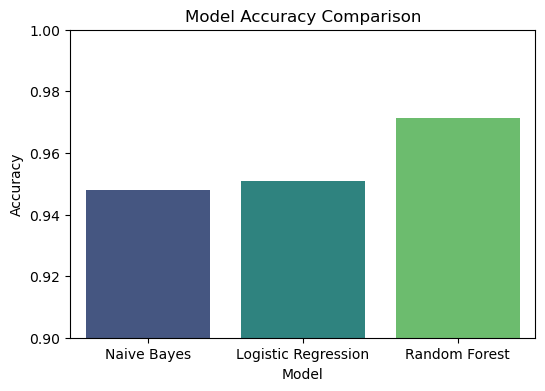

In [30]:
accuracy_data = {'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
                 'Accuracy': [nb_accuracy, lr_accuracy, rf_accuracy]}
accuracy_df = pd.DataFrame(accuracy_data)

plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0) # Set y-axis limit for better comparison
plt.ylabel('Accuracy')
plt.xlabel('Model')

plt.show()

⏺***Confusion Matrix Comparison with Heatmaps***

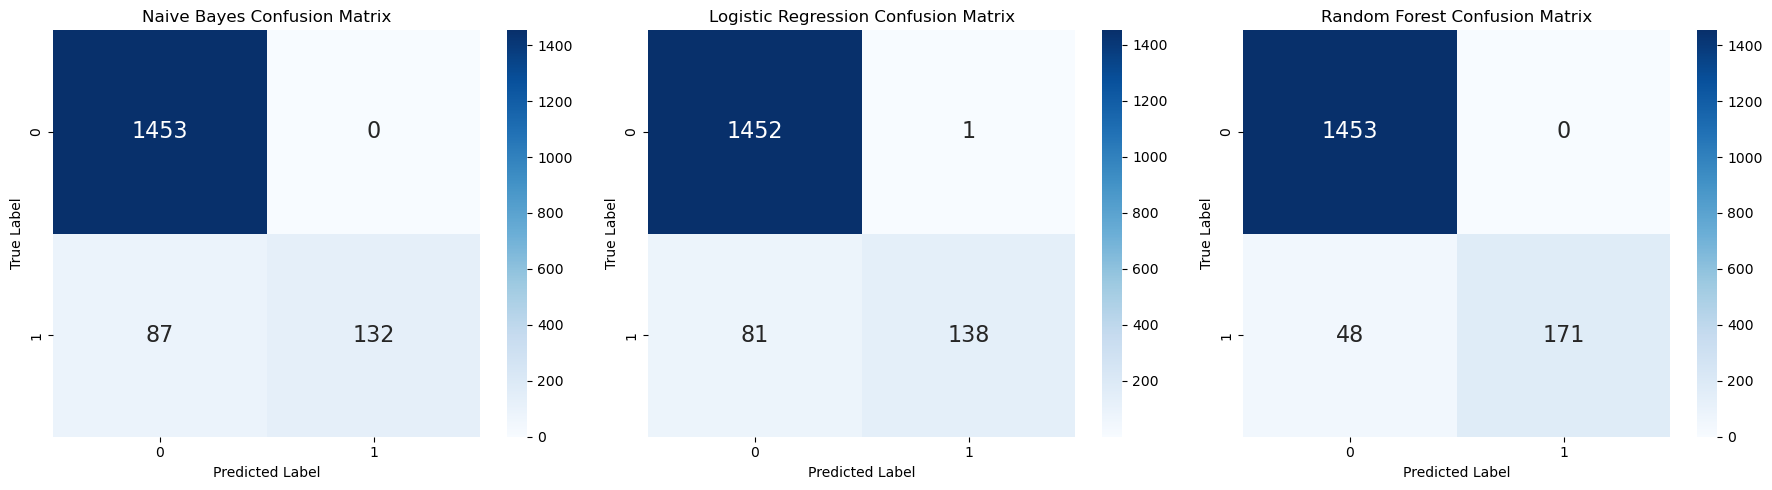

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.patch.set_facecolor('white') # Set figure background to white


for i, (model_name, matrix) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"size": 16})
    ax.set_title(f'{model_name} Confusion Matrix', color='black')
    ax.set_xlabel('Predicted Label', color='black')
    ax.set_ylabel('True Label', color='black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.set_facecolor('white') # Set axes background to white


plt.tight_layout()
plt.show()



> Based on the comparative analysis, the **Random Forest model** is the best performing model for this email spam classification task using TF-IDF features. It demonstrates the highest overall accuracy and is most effective at correctly identifying 'spam' messages while avoiding misclassifying 'ham' messages.



## Conclusion:

---
Based on these metrics breakdowns:

             Accuracy         Recall
             -----------------------
             NB: ~94.8%         0.60
             LR: ~95.1%         0.63
             RF: ~97.1%         0.78  

### Data Analysis Key Findings-
* All three evaluated models demonstrated high accuracy in classifying spam and ham messages, and provided the right prediction during verfication wwith input data, that indicating their suitability for this task.  

* While **Naive Bayes Model** called a strong baseline for text classification and performs surprisingly well with sparse data. In this case, it also provided a advisable accuracy. Apart from that, **Logistic Regression Model** also provided very high accuracy. Althouh **Random Forest Model** performs poorly on high-dimensional sparse text (like bag-of-words) but, **for this particular dataset and with TF-IDF features**, it yielded better results here.

